# 9.그래프와 시각화

## 9.1 matplotlib API 간략하게 살펴보기

In [3]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

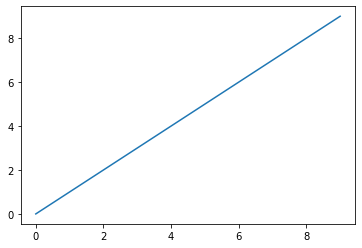

In [5]:
plt.plot(data)

### 9.1.1 figure와 서브플롯

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

- figure라는 객체가 생성됨
- 빈 객체에 subplot이 있어야 그래프를 그릴 수 있음

In [7]:
ax1 = fig.add_subplot(2,2,1)

figure 크기가 2x2이고 4개 중 첫번째를 선택하겠다는 의미

In [8]:
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

셀을 새로 시작하면 리셋되기 때문에 한 셀에 해줘야 그려짐

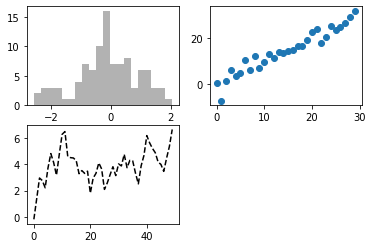

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
_ = ax1.hist(np.random.randn(100),bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), 'k--')

- 'k--'는 검은 점선 옵션

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B16AF7DF88>,
      dtype=object)

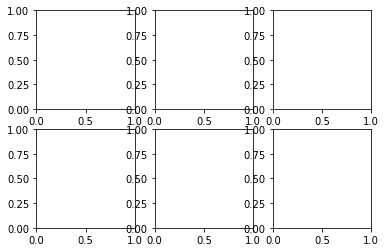

In [18]:
fig, axes = plt.subplots(2,3)

axes

- plt.subplots이라는 편리한 메서드가 있음
- 배열로 쉽게 사용
- sharex, sharey 인자를 통해 축을 공유할 수 있음

**plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace=None, hspace=None)**

- 위 함수를 통해 서브플롯 간의 간격 조절

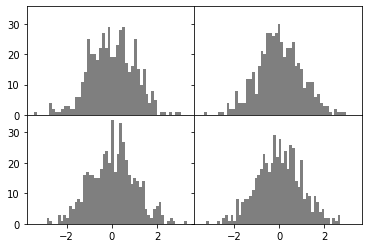

In [21]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50, color = 'k', alpha = .5)
plt.subplots_adjust(wspace = 0, hspace = 0)

### 9.1.2 색상, 마커, 선 스타일

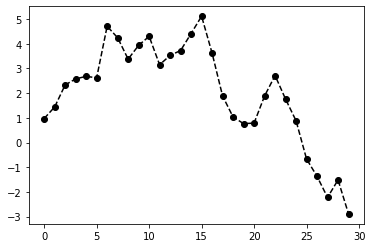

In [27]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

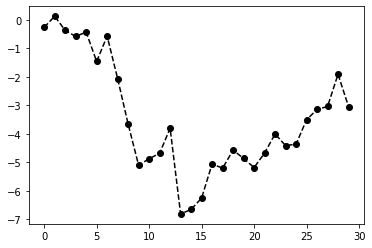

In [29]:
plt.plot(randn(30).cumsum(), color='k',linestyle='dashed',marker='o')

위 두 개는 같은 원리의 그래프

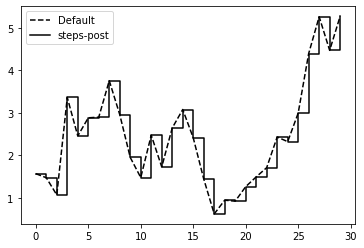

In [34]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label = 'Default')
plt.plot(data, 'k-', drawstyle = 'steps-post',label='steps-post')

plt.legend(loc='best')

### 9.1.3 눈금, 라벨, 범례

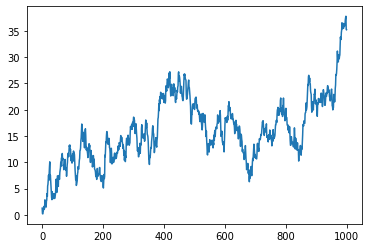

In [42]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum())

Text(0.5, 0, 'Stages')

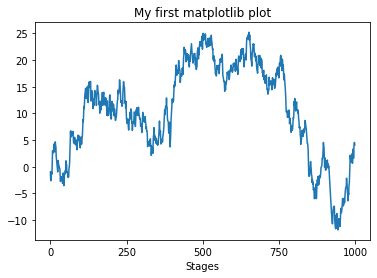

In [50]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ticks = ax.set_xticks([0,250,500,750,1000])

ax.plot(np.random.randn(1000).cumsum())
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

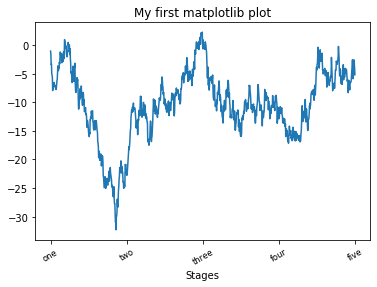

In [52]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation = 30, fontsize='small')

ax.plot(np.random.randn(1000).cumsum())
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

- set_xticks: 데이터 범위에서 눈금을 어디에 표시할지
- set_xticklabels: 눈금 이름을 바꿀때

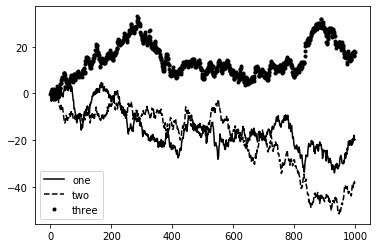

In [55]:
from numpy.random import randn

fig = plt.figure(); ax=fig.add_subplot(1,1,1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

label을 추가하면 범례 추가 가능

### 9.1.4 주석과 그림 추가하기

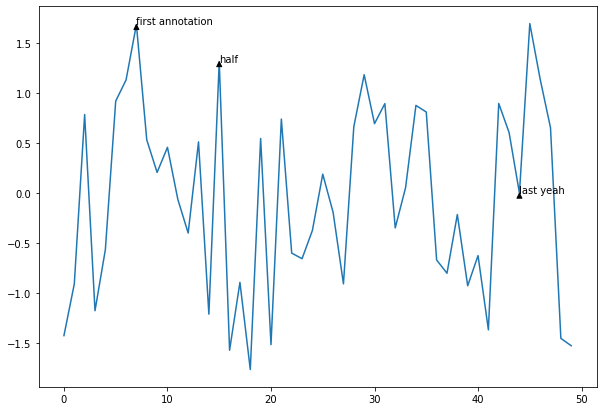

In [83]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

data = np.random.randn(50)

ax.plot(data)

crisis_data = [(7,'first annotation'),(15,'half'),(44,'last yeah')]

for x, label in crisis_data:
    ax.annotate(label, xy=(x,data[x]), xytext=(x,data[x]), 
                arrowprops=dict(facecolor='black',headwidth=5,width=5,headlength=5),
                horizontalalignment='left')

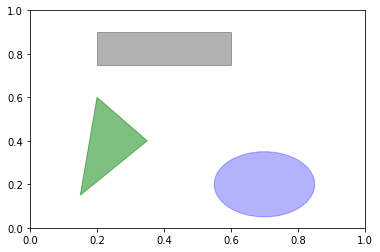

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((.2,.75),.4,.15,color='k',alpha=.3)
circ = plt.Circle((.7,.2),.15, color='b',alpha=.3)
pgon = plt.Polygon([[.15,.15],[.35,.4],[.2,.6]],color='g',alpha=.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 9.1.5 matplotlib 설정

In [86]:
plt.rc('figure',figsize=(10,10))

In [92]:
font_options = {'family':'monospace',
                'weight':'bold'}
plt.rc('font',**font_options)

## 9.2 pandas에서 seaborn으로 그래프 그리기

### 9.2.1. 선그래프

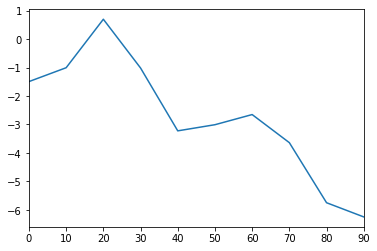

In [4]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))

s.plot()

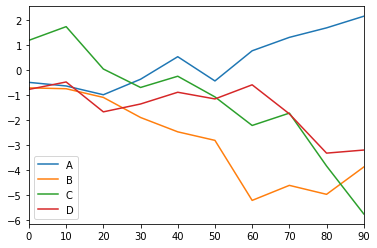

In [9]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns = ['A','B','C','D'], index = np.arange(0,100,10))

df.plot()

### 9.2.2 막대그래프

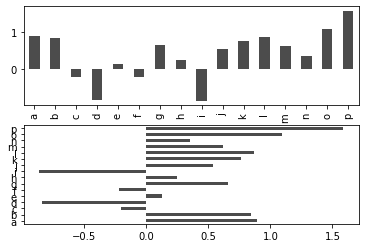

In [13]:
fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.randn(16), index = list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color = 'k', alpha=.7)
data.plot.barh(ax=axes[1], color = 'k', alpha=.7)

- k는 검은색
- alpha는 투명도

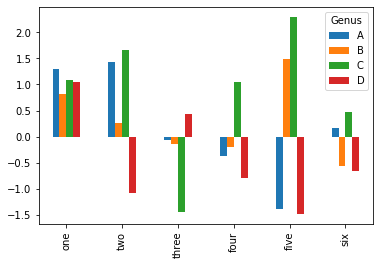

In [16]:
df = pd.DataFrame(np.random.randn(6,4),
                  index = ['one','two','three','four','five','six'],
                  columns = pd.Index(list('ABCD'), name = 'Genus'))

df.plot.bar()

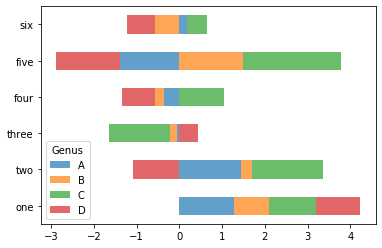

In [17]:
df.plot.barh(stacked=True, alpha=.7)

In [19]:
df

Genus,A,B,C,D
one,1.288279,0.811101,1.088005,1.049220
two,1.435757,0.264721,1.664329,-1.088670
three,-0.066614,-0.142951,-1.442721,0.437695
four,-0.366831,-0.200072,1.047501,-0.785154
five,-1.397020,1.485635,2.301860,-1.489640
six,0.167687,-0.560449,0.477327,-0.664204


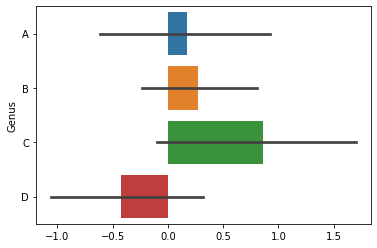

In [21]:
import seaborn as sns

sns.barplot(data=df,orient='h')

시각화는 따로 정리한다.